In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

## Preliminary K alpha lines analysis

In [2]:
K_alpha = pd.read_csv("K-alpha analysis.csv")
K_alpha

,Ato,Kline,Uncertainty,Energy(keV),FWHM
0,17,319.91,5.53,2.62239,19.2335
1,22,540.14,0.36,4.51080,24.2249
2,24,646.27,0.47,5.41470,25.4010
3,26,761.83,0.54,6.40380,25.8590
4,28,888.28,0.42,7.47810,26.6226
5,29,954.62,0.36,8.04770,27.9838
6,30,1024.15,0.27,8.63880,28.2923
7,47,2602.78,0.75,22.16290,38.6308
8,48,2720.37,0.57,23.17360,41.4460
9,50,2963.52,0.61,25.27130,45.7194


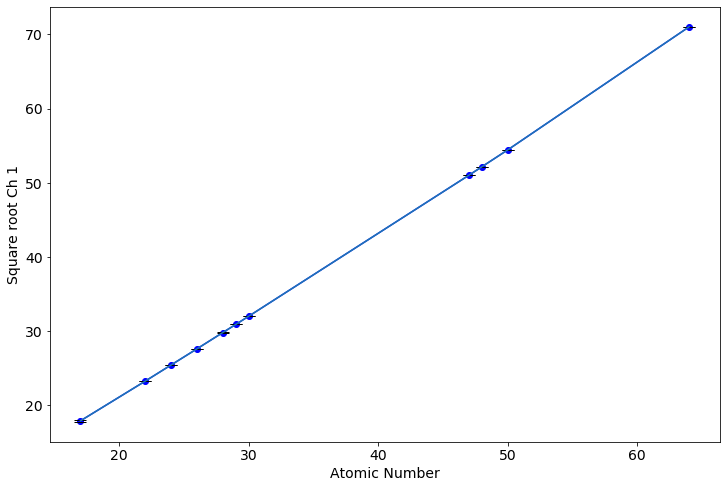

array([ 1.12660132, -1.65880752])

In [3]:
#First calculate the error propagation in this square root process
yerr = 0.5 * (K_alpha.Uncertainty / K_alpha.Kline) * np.sqrt(K_alpha.Kline)
#yerr = K_alpha.Uncertainty
mpl.rcParams['figure.figsize'] = 12.0,8.0  
mpl.rcParams['font.size'] = 14.0 

plt.yscale('linear')  
plt.xscale('linear')

plt.xlabel(r'Atomic Number')
plt.ylabel(r'Square root Ch 1')

plt.plot(K_alpha.Ato,np.sqrt(K_alpha.Kline),"o-b")
plt.errorbar(K_alpha.Ato, np.sqrt(K_alpha.Kline), yerr = yerr, capsize = 6, ecolor = 'black')
plt.show()
#line fit the atomic number and sqrt of Ch, returns coefficient of the polynomial
coef = np.polyfit(K_alpha.Ato, np.sqrt(K_alpha.Kline), deg = 1)
coef

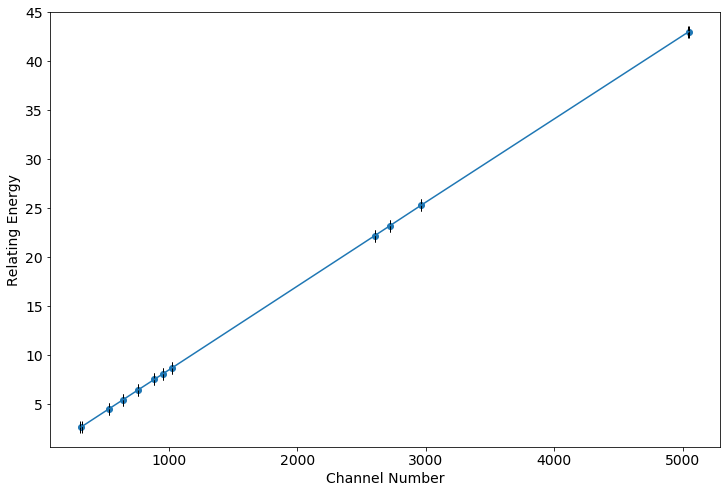

array([ 0.00855077, -0.1078123 ])

In [4]:
xerr = K_alpha.Uncertainty
mpl.rcParams['figure.figsize'] = 12.0,8.0  
mpl.rcParams['font.size'] = 14.0 

plt.yscale('linear')  
plt.xscale('linear')

plt.xlabel(r'Channel Number')
plt.ylabel(r'Relating Energy')

plt.plot(K_alpha.Kline,K_alpha['Energy(keV)'],"o")
plt.errorbar(K_alpha.Kline, K_alpha['Energy(keV)'], xerr = xerr, capsize = 6, ecolor = 'black')
plt.show()
#line fit Ch and its relating energy, return coefficient of the polynomial
coef2 = np.polyfit(K_alpha.Kline, K_alpha['Energy(keV)'], deg = 1)
coef2